# Hash Function Distribution Examples
This notebook contains Python code examples for evaluating hash function distribution across buckets.

In [12]:
import matplotlib.pyplot as plt
from collections import defaultdict
import hashlib
import statistics

## Utility Function: Bucket Distribution

In [13]:
def bucket_distribution(data, num_buckets, hash_fn):
    buckets = defaultdict(list)
    for item in data:
        bucket = hash_fn(item) % num_buckets
        buckets[bucket].append(item)
    return buckets

- Mod by number of buckets to keep value within usable range

## Hash Function Definitions

In [14]:
def poor_hash(key):
    return len(key)

def simple_ascii_sum(key):
    return sum(ord(char) for char in key)

def hash_sha256(key):
    return int(hashlib.sha256(key.encode()).hexdigest(), 16)

- poor hash will collide a lot, too simple

## Dataset and Plotting Utility

In [15]:
data = [f"key{i}" for i in range(1000)]
num_buckets = 10

def plot_distribution(title, counts):
    plt.bar(range(len(counts)), counts)
    plt.title(title)
    plt.xlabel("Bucket")
    plt.ylabel("# of Keys")
    plt.show()

- makes a bar graph

## Example 1: Python Built-in hash()

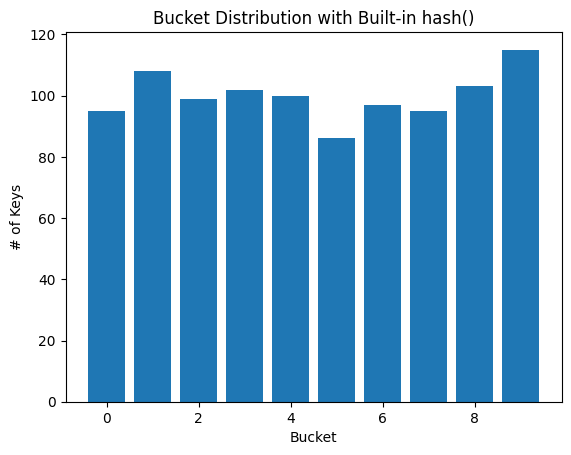

In [16]:
buckets = bucket_distribution(data, num_buckets, hash)
counts = [len(buckets[i]) for i in range(num_buckets)]
plot_distribution("Bucket Distribution with Built-in hash()", counts)

- Salted by default: values vary per session
    - can set PYTHONHASHSEED=0 python script.py
- Fairly uniform distribution
- can vary more or less, peaks are curves/small normal distributions

In [17]:
print(hash('apple'))
print(hash('charry'))

4296201851571352020
-2182345952640457972


## Example 2: Poor Hash Function (len of key)

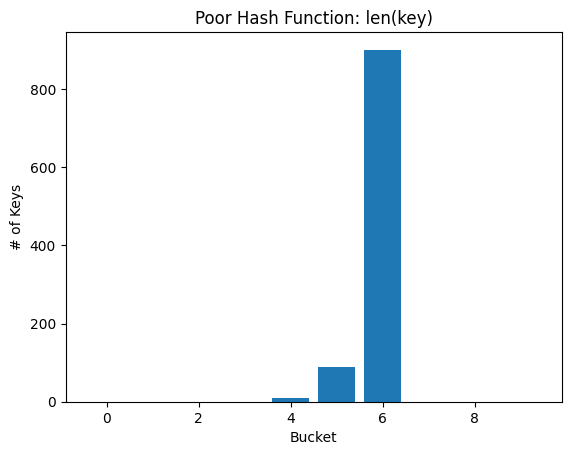

In [18]:
buckets = bucket_distribution(data, num_buckets, poor_hash)
counts = [len(buckets[i]) for i in range(num_buckets)]
plot_distribution("Poor Hash Function: len(key)", counts)

- this is bad
- not uniformly distributed normally at all
- takes up 3 buckets, most are in the same bin

## Example 3: Simple ASCII Sum

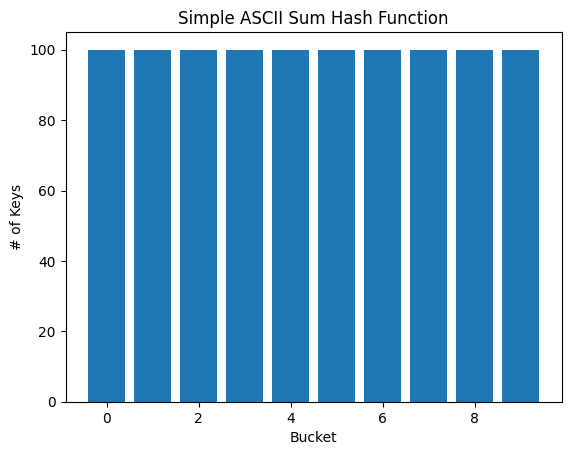

In [19]:
buckets = bucket_distribution(data, num_buckets, simple_ascii_sum)
counts = [len(buckets[i]) for i in range(num_buckets)]
plot_distribution("Simple ASCII Sum Hash Function", counts)

- perfectly uniform distribution

## Example 4: SHA-256

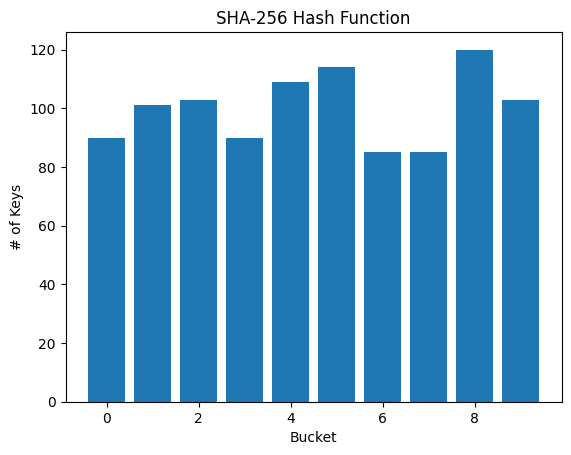

In [20]:
buckets = bucket_distribution(data, num_buckets, hash_sha256)
counts = [len(buckets[i]) for i in range(num_buckets)]
plot_distribution("SHA-256 Hash Function", counts)

- produced value from a file/passwords/sensitive information
- relativly uniform distribution
- seems to have more variation, doesn't seem to have the small normal curves anymore

## Metrics for Last Distribution

In [21]:
std_dev = statistics.stdev(counts)
max_bucket = max(counts)
collisions = sum(count - 1 for count in counts if count > 1)

print("=== Distribution Metrics ===")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Max Bucket Size: {max_bucket}")
print(f"Collisions: {collisions}")

=== Distribution Metrics ===
Standard Deviation: 12.23
Max Bucket Size: 120
Collisions: 990


## Reflection 1

- Which distribution was most surprising?
The Simple ASCII Sum was the most surprising to me, I didn't expect the distributions to be completely even. 
- What unexpected patterns did you observe?
The first interesting pattern I saw was how in the built in Hash Function the peaks had the bars near them increasing as well. They almost looked like small normal curves within the graph. This did not show up in peaks of the Sha function however. 